# PASCAL TRINAGLE

In [ ]:
# https://en.wikipedia.org/wiki/Pascal%27s_triangle

In [1]:
import math
import pandas as pd
import seaborn as sns

s = []

# pascals_tri_formula = [] # don't collect in a global variable.

def combination(n, r): # correct calculation of combinations, n choose k
    return int((math.factorial(n)) / ((math.factorial(r)) * math.factorial(n - r)))

def for_test(x, y): # don't see where this is being used...
    for y in range(x):
        return combination(x, y)

def pascals_triangle(rows):
    result = [] # need something to collect our results in
    # count = 0 # avoidable! better to use a for loop, 
    # while count <= rows: # can avoid initializing and incrementing 
    for count in range(rows): # start at 0, up to but not including rows number.
        # this is really where you went wrong:
        row = [] # need a row element to collect the row in
        for element in range(count + 1): 
            # putting this in a list doesn't do anything.
            # [pascals_tri_formula.append(combination(count, element))]
            row.append(combination(count, element))
        result.append(row)
        # count += 1 # avoidable
    return result

# now we can print a result:
for row in pascals_triangle(100):
    print(row)
    s.append(row)

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]
[1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1]
[1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1]
[1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1]
[1, 14, 91, 364, 1001, 2002, 3003, 3432, 3003, 2002, 1001, 364, 91, 14, 1]
[1, 15, 105, 455, 1365, 3003, 5005, 6435, 6435, 5005, 3003, 1365, 455, 105, 15, 1]
[1, 16, 120, 560, 1820, 4368, 8008, 11440, 12870, 11440, 8008, 4368, 1820, 560, 120, 16, 1]
[1, 17, 136, 680, 2380, 6188, 12376, 19448, 24310, 24310, 19448, 12376, 6188, 2380, 680, 136, 17, 1]
[1, 18, 153, 816, 3060, 8568, 18564, 31824, 43758, 48620, 43758, 31824, 18564, 8568, 3060, 816, 153, 18, 1]
[1, 19, 171, 969, 3876, 11628, 27132, 50388, 75582, 92378, 92378, 75582, 50388, 27132, 11628, 3876, 969, 171, 19, 1]
[

## TABLE WITH WINNING ODDS WHEN SCORE IS m to n

In [ ]:
# http://www.righto.com/2011/07/mathematics-of-volleyball.html

In [ ]:
# https://thedataincubator.github.io/coding-challenges/challenges/volleyball-match.html

In [2]:
aap = []
bbp = []

#Prepare possible points for the pivot table
for aa in range(0, 26):
    for bb in range(0, 26):
        aap.append(aa)
        bbp.append(bb)

In [3]:
#Raw table
ra_da = {"Home":aap, "Away":bbp}

#Create table
volley = pd.DataFrame(ra_da)

In [4]:
#Show first 10 rows
volley.head(10)

,Home,Away
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
5,0,5
6,0,6
7,0,7
8,0,8
9,0,9


In [5]:
#Difference between home and away team
volley["Diff"] = volley["Home"] - volley["Away"]

#Home team need x points to win
volley["Home_to_win"] = 25 - volley["Home"]
#Away team need x points to win
volley["Away_to_win"] = 25 - volley["Away"]

In [6]:
#Show the table
volley

,Home,Away,Diff,Home_to_win,Away_to_win
0,0,0,0,25,25
1,0,1,-1,25,24
2,0,2,-2,25,23
3,0,3,-3,25,22
4,0,4,-4,25,21
...,...,...,...,...,...
671,25,21,4,0,4
672,25,22,3,0,3
673,25,23,2,0,2
674,25,24,1,0,1


In [7]:
#Return row from Pascal triangle
class Solution:
    def solve(self, n):
        if n==0:
            return [1]
        if n==1:
            return [1,1]
        ls=[1,1]
        temp=[1,1]
        for i in range(2,n+1):
            ls=temp
            temp=[1]
            for i in range(len(ls)-1):
                temp.append(ls[i]+ls[i+1])
            temp.append(1)
        return temp
ob = Solution()

print(ob.solve(4))

[1, 4, 6, 4, 1]


In [8]:
#Calculate probability from home team point of view
def points(aa, bb):
    a = 25 - aa
    b = 25 - bb
    c = a+b-1
    d = b - 1
    e = sum(ob.solve(c)[:d+1])
    try:
        result = e / 2**(a+b-1)
    except ValueError:
        result = 0.5
    return result

In [9]:
#Premare data to column
dat = []
for ho in range(len(volley["Home"])):
    dat.append(points(volley["Home"][ho], volley["Away"][ho]))

In [10]:
#Round the numbers
das = []
for lala in dat:
    das.append(round(lala, 2))

In [11]:
volley["prob"] = das
volley["prob"] = volley["prob"] * 100

In [12]:
#Table
volley

,Home,Away,Diff,Home_to_win,Away_to_win,prob
0,0,0,0,25,25,50.0
1,0,1,-1,25,24,44.0
2,0,2,-2,25,23,39.0
3,0,3,-3,25,22,33.0
4,0,4,-4,25,21,28.0
...,...,...,...,...,...,...
671,25,21,4,0,4,100.0
672,25,22,3,0,3,100.0
673,25,23,2,0,2,100.0
674,25,24,1,0,1,100.0


In [13]:
#Data in pivot table
tablewinning = pd.pivot_table(volley, index=volley["Home"], columns=volley["Away"]) ["prob"]
tablewinning

Away,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
Home,,,,,,,,,,,,,,,,,,,,,
0,50.0,44.0,39.0,33.0,28.0,23.0,18.0,14.0,11.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,56.0,50.0,44.0,38.0,33.0,27.0,22.0,17.0,13.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61.0,56.0,50.0,44.0,38.0,32.0,27.0,21.0,17.0,13.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,67.0,62.0,56.0,50.0,44.0,38.0,32.0,26.0,21.0,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72.0,67.0,62.0,56.0,50.0,44.0,37.0,31.0,26.0,20.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,77.0,73.0,68.0,62.0,56.0,50.0,44.0,37.0,31.0,25.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,82.0,78.0,73.0,68.0,63.0,56.0,50.0,43.0,37.0,30.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,86.0,83.0,79.0,74.0,69.0,63.0,57.0,50.0,43.0,36.0,...,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,89.0,87.0,83.0,79.0,74.0,69.0,63.0,57.0,50.0,43.0,...,5.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Confiigure size of the picture
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

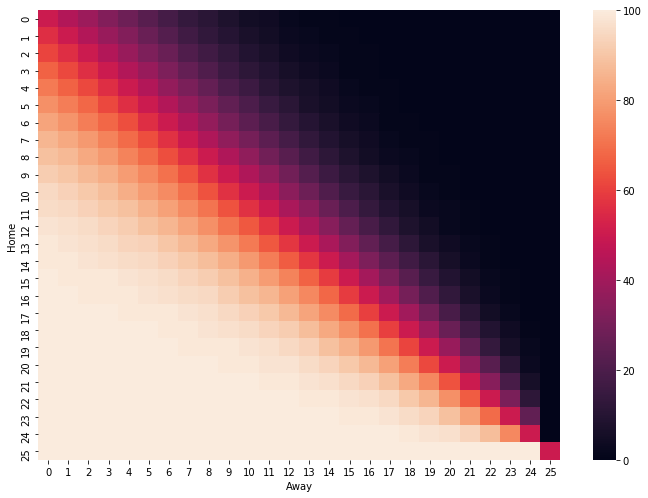

In [15]:
#Show probability in heat map
sns.heatmap(tablewinning)

## THE IMPORTANCE OF A POINT

In [16]:
#Prepare data
def Xpoints(home_points, away_points):
    z = 25 - home_points
    y = 25 - away_points
    x = z+y-1
    w = y - 1
    print(x)
    print(w)
    v = sum(ob.solve(x)[:w+1])
    print(v)
    try:
        result1 = v / 2**(z+y-2)
    except ValueError:
        result1 = 0.5
    return result1

In [17]:
#Calculate probability
def Xpoints(home_points, away_points):
    z = 25 - home_points
    y = 25 - away_points
    x = z+y-2
    w = z - 1
    v = sum(ob.solve(x)[w:w+1])
    try:
        result1 = v / 2**(z+y-2)
    except ValueError:
        result1 = 0.5
    return result1

In [18]:
#Prepare data to column
percent = []
for first in range(len(volley["Home"])):
    percent.append(round(Xpoints(volley["Home"][first], volley["Away"][first])*100, 2))

In [19]:
volley["percent"] = percent

In [20]:
#Table
volley

,Home,Away,Diff,Home_to_win,Away_to_win,prob,percent
0,0,0,0,25,25,50.0,11.46
1,0,1,-1,25,24,44.0,11.46
2,0,2,-2,25,23,39.0,11.21
3,0,3,-3,25,22,33.0,10.73
4,0,4,-4,25,21,28.0,10.01
...,...,...,...,...,...,...,...
671,25,21,4,0,4,100.0,0.00
672,25,22,3,0,3,100.0,0.00
673,25,23,2,0,2,100.0,0.00
674,25,24,1,0,1,100.0,50.00


In [21]:
#Data in pivot table
importanceofthepoint = pd.pivot_table(volley, index=volley["Home"], columns=volley["Away"]) ["percent"]
importanceofthepoint

Away,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
Home,,,,,,,,,,,,,,,,,,,,,
0,11.46,11.46,11.21,10.73,10.01,9.10,8.04,6.89,5.72,4.57,...,0.24,0.12,0.06,0.02,0.01,0.00,0.00,0.00,0.00,0.0
1,11.46,11.70,11.70,11.44,10.92,10.16,9.19,8.07,6.86,5.63,...,0.37,0.19,0.09,0.04,0.01,0.00,0.00,0.00,0.00,0.0
2,11.21,11.70,11.96,11.96,11.68,11.13,10.31,9.28,8.09,6.81,...,0.55,0.29,0.14,0.06,0.02,0.01,0.00,0.00,0.00,0.0
3,10.73,11.44,11.96,12.24,12.24,11.94,11.34,10.47,9.37,8.10,...,0.80,0.44,0.22,0.10,0.04,0.01,0.00,0.00,0.00,0.0
4,10.01,10.92,11.68,12.24,12.54,12.54,12.22,11.57,10.63,9.45,...,1.16,0.66,0.34,0.16,0.06,0.02,0.01,0.00,0.00,0.0
5,9.10,10.16,11.13,11.94,12.54,12.86,12.86,12.51,11.82,10.80,...,1.65,0.98,0.53,0.25,0.11,0.04,0.01,0.00,0.00,0.0
6,8.04,9.19,10.31,11.34,12.22,12.86,13.21,13.21,12.83,12.07,...,2.33,1.43,0.80,0.40,0.17,0.06,0.02,0.00,0.00,0.0
7,6.89,8.07,9.28,10.47,11.57,12.51,13.21,13.58,13.58,13.17,...,3.22,2.06,1.20,0.63,0.29,0.11,0.03,0.01,0.00,0.0
8,5.72,6.86,8.09,9.37,10.63,11.82,12.83,13.58,13.99,13.99,...,4.38,2.92,1.78,0.97,0.46,0.18,0.06,0.01,0.00,0.0


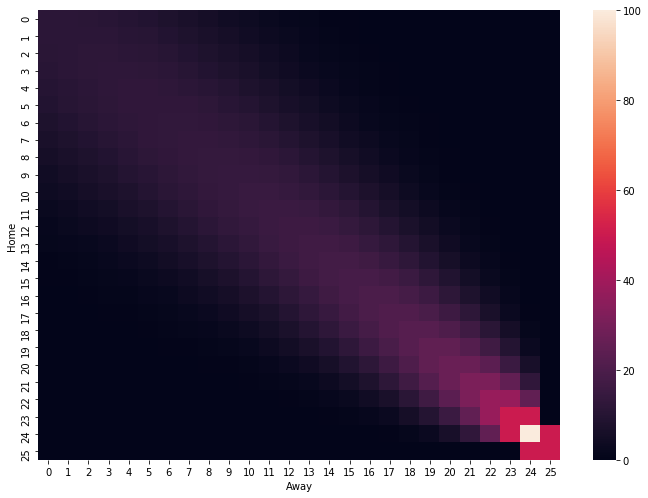

In [22]:
#Heat map with importance of the point
sns.heatmap(importanceofthepoint)